In [1]:
import sax
from simphony.libraries import siepic,sipann
import quantp  as qp
from functools import partial
from simphony.quantum import QuantumState
import numpy as np
import matplotlib.pyplot as plt



INFO:tensorflow:Restoring parameters from c:\Users\akhil\Miniconda3\Lib\site-packages\SiPANN\ANN\TIGHT_ANGLE_GAP/model
INFO:tensorflow:Restoring parameters from c:\Users\akhil\Miniconda3\Lib\site-packages\SiPANN\ANN\TIGHT_ANGLE_STRAIGHT/model
INFO:tensorflow:Restoring parameters from c:\Users\akhil\Miniconda3\Lib\site-packages\SiPANN\ANN\TIGHT_ANGLE_BENT_RAND/model


In [2]:
#su4 rotator


def su_4(wl=1.55,theta1=0,phi1=0,theta2=0,phi2=0,theta3=0,phi3=0,theta4=0,phi4=0,theta5=0,phi5=0,theta6=0,phi6=0)->sax.SDict:
    

    su4,info=sax.circuit(netlist={
        "instances":{
            "su1":"SU_rotator",
            "su2":"SU_rotator",
            "su3":"SU_rotator",
            "su4":"SU_rotator",
            "su5":"SU_rotator",
            "su6":"SU_rotator",
            },
            "connections":{
                "su1,outt":"su2,int",
                "su1,outb":"su4,int",
                "su4,outt":"su2,inb",
                "su4,outb":"su6,int",
                "su6,outt":"su5,inb",
                "su5,outt":"su3,inb",
                "su2,outt":"su3,int",
                "su2,outb":"su5,int",
                
                
            },
            "ports":{
                "in1":"su1,int",
                "in2":"su1,inb",
                "in3":"su4,inb",
                "in4":"su6,inb",
                "out1":"su3,outt",
                "out2":"su3,outb",
                "out3":"su5,outb",
                "out4":"su6,outb"
            }
        },models=
        {"SU_rotator":partial(qp.trr)})
    

    val=su4(wl=wl,su1={"theta":theta1,"phi":phi1},
              su2={"theta":theta2,"phi":phi2},
              su3={"theta":theta3,"phi":phi3},
              su4={"theta":theta4,"phi":phi4},
              su5={"theta":theta5,"phi":phi5},
              su6={"theta":theta6,"phi":phi6})
    return val


In [ ]:
np.random.seed(42)
thet_val=[0,0.25,0.5]
phi_val=[0,0.25,0.5,0.75,1]





i1=np.random.randint(len(thet_val))
i2=np.random.randint(len(thet_val))
i3=np.random.randint(len(thet_val))
i4=np.random.randint(len(thet_val))
i5=np.random.randint(len(thet_val))
i6=np.random.randint(len(thet_val))

j1=np.random.randint(len(phi_val))
j2=np.random.randint(len(phi_val))
j3=np.random.randint(len(phi_val))
j4=np.random.randint(len(phi_val))
j5=np.random.randint(len(phi_val))
j6=np.random.randint(len(phi_val))

i1=thet_val[i1]
i2=thet_val[i2]
i3=thet_val[i3]
i4=thet_val[i4]
i5=thet_val[i5]
i6=thet_val[i6]
j1=phi_val[j1]
j2=phi_val[j2]
j3=phi_val[j3]
j4=phi_val[j4]
j5=phi_val[j5]
j6=phi_val[j6]

In [169]:
from simphony.quantum import QuantumSim, CoherentState, SqueezedState,TwoModeSqueezedState
from simphony.quantum import QuantumResult

wl = 1.55 # um
sim = QuantumSim(ckt=su_4, wl=wl,theta1=i1,phi1=j1,theta2=i2,phi2=j2,theta3=i3,phi3=j3,theta4=i4,phi4=j4,theta5=i5,phi5=j5,theta6=i6,phi6=j6)
    
sim.add_qstate
from simphony.quantum import TwoModeSqueezedState
# qstate= TwoModeSqueezedState(r=1,n_a=1,n_b=50,port_a="in1",port_b="in2")
qstate= SqueezedState(port="in1", r=0.9, phi=np.pi*0.5, alpha=1+1j*1)
# qstate = CoherentState(port="in1", alpha=1+2j)
sim.add_qstate(qstate=qstate)
res = sim.run()
res_state = res.state()


In [202]:
np.shape(res.cov)

(1, 32, 32)

[[1. +0.j 4. +0.j 5.+12.j]]
(10+12j)


In [ ]:



f=plt.figure()

f.set_figheight(100)
f.set_figwidth(100)


fig,axes=plt.subplots(1,2)
axes=axes.flatten()
for i in range(2):
 f.tight_layout(pad=3.0)

 qstate.plot_mode(mode=i, ax=axes[i])


In [ ]:

f=plt.figure()

f.set_figheight(100)
f.set_figwidth(100)


fig,axes=plt.subplots(4,4)
axes=axes.flatten()
for i in range(16):
 f.tight_layout(pad=3.0)

 qstate.plot_mode(mode=i, ax=axes[i])


In [ ]:
QuantumResult.state(res)

In [ ]:
from simphony.quantum import plot_quantum_result

# print(res)

plot_quantum_result(res, wl_ind=0, include_loss_modes=True)

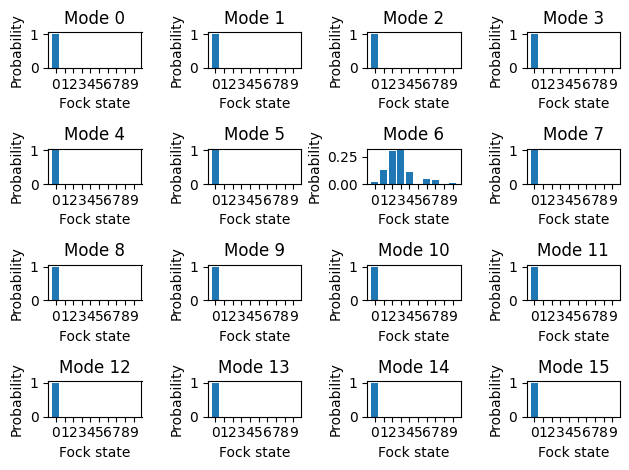

In [170]:
import thewalrus as tw

wl = 1.55 # um

res_state = res.state()


fig, axes = plt.subplots(4,4)
axes = axes.flatten()
for i in range(res_state.N):
    means, cov = res_state.modes(i)
    fock_amp = tw.quantum.state_vector(means, cov, cutoff=10, hbar=1/2, check_purity=True)
    ax = axes[i]
    ax.set_title(f'Mode {i}')
    ax.bar(range(len(fock_amp)), abs(fock_amp)**2)
    ax.set_xticks(range(len(fock_amp)), range(len(fock_amp)))
    ax.set_xlabel("Fock state")
    ax.set_ylabel("Probability")
plt.tight_layout()
plt.show()